ПИН б-з-19-1, Диденко Мария


In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [ ]:
df = pd.read_csv('/content/cars_moldova_no_dup.csv', delimiter = ',')

In [ ]:
df.duplicated().sum()

0

In [ ]:
DF = df.drop_duplicates().reset_index(drop=True)


In [ ]:
DF.to_csv('/content/cars_no_dup.csv',index=False)

In [ ]:
DF.sort_values(by = 'Year', ascending= False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
29164,Audi,A5,2021,Sedan,661.0,2000.0,Petrol,Automatic,32200.0
32583,Mercedes,GLS Klass,2021,SUV,0.0,3000.0,Diesel,Automatic,107528.0
15611,Volkswagen,Polo,2021,Universal,280000.0,1400.0,Petrol,Manual,1900.0
6044,Skoda,Superb,2021,Sedan,0.0,1500.0,Petrol,Automatic,30000.0
11840,Toyota,Corolla,2021,Universal,288.0,1987.0,Hybrid,Automatic,23000.0
...,...,...,...,...,...,...,...,...,...
22488,Audi,80,1900,Sedan,0.0,1000.0,Petrol,Manual,1500.0
37134,Mazda,323,1900,Sedan,145000.0,1800.0,Petrol,Manual,1450.0
27647,Vaz,2108,1900,Universal,57885658.0,889.0,Petrol,Manual,3500.0
36443,Toyota,Carina,1900,Sedan,2200.0,1800.0,Petrol,Manual,1600.0


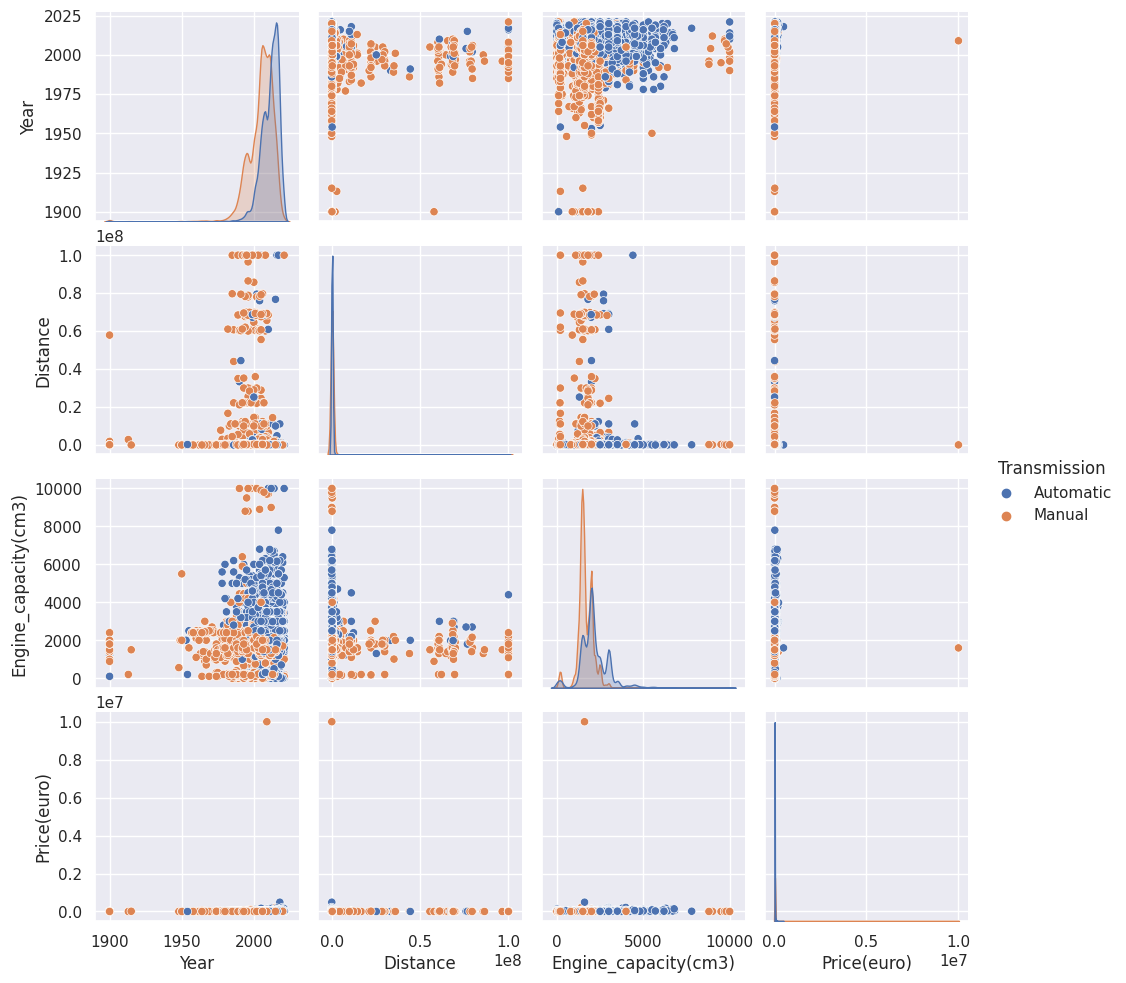

In [ ]:
sns.pairplot(data = DF, hue ='Transmission')

In [ ]:
cat_columns = []
num_columns = []
for column_name in df.columns:
 if (df[column_name].dtypes == object):
   cat_columns +=[column_name]
 else:
   num_columns +=[column_name]

In [ ]:
DF[num_columns].describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,37264.000000,3.726400e+04,37264.000000,3.726400e+04
mean,2007.709264,4.758488e+05,1858.932535,9.569387e+03
std,8.295806,4.591520e+06,707.662731,5.283315e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,9.000000e+04,1499.000000,3.300000e+03
50%,2009.000000,1.700000e+05,1800.000000,6.490000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.179900e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


In [ ]:
question_dist = df[(df.Year < 2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

question_dist = df[(df.Distance > 500000)]
df = df.drop(question_dist.index)

question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df.tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
37258,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0
37263,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0


In [ ]:
M = DF[num_columns].mean()
STD = DF[num_columns].std()
DF_scaled = (DF[num_columns]-M)/STD
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


<Axes: xlabel='Distance', ylabel='Count'>

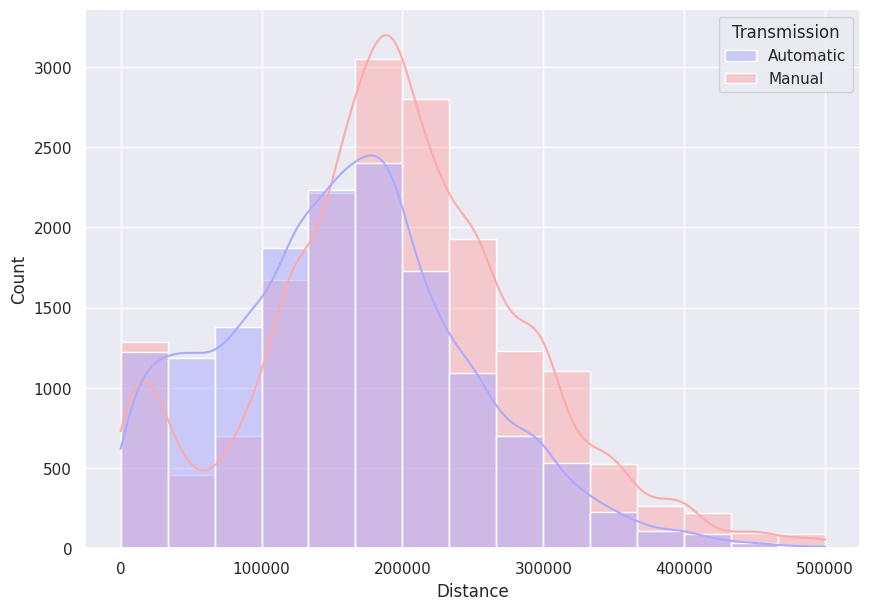

In [ ]:
Xmin = DF[num_columns].min()
Xmax = DF[num_columns].max()
DF_norm = (DF[num_columns]- Xmin)/( Xmax - Xmin)

fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

In [ ]:
DF[cat_columns].nunique()
сounts = DF.Make.value_counts()
rare = сounts[(сounts.values < 25)]
DF['Make'] = DF['Make'].replace(rare.index.values, 'Rare')
DF['Transmission'] = DF['Transmission'].map({'Automatic': 1,
'Manual': 0})

In [ ]:
DF_ce = df.copy()
DF_ce[cat_columns] = DF_ce[cat_columns].astype('category')
for _, column_name in enumerate(cat_columns):
 DF_ce[column_name] = DF_ce[column_name].cat.codes

 DF_ohe = pd.get_dummies(DF.copy())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32437 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32437 non-null  object 
 1   Model                 32437 non-null  object 
 2   Year                  32437 non-null  int64  
 3   Style                 32437 non-null  object 
 4   Distance              32437 non-null  float64
 5   Engine_capacity(cm3)  32437 non-null  float64
 6   Fuel_type             32437 non-null  object 
 7   Transmission          32437 non-null  object 
 8   Price(euro)           32437 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.5+ MB


In [ ]:
DF['Age'] = 2022 - DF.Year
DF['km_year'] = DF.Distance/DF.Age

cm = sns.color_palette('vlag', as_cmap=True)
DF.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

<ipython-input-76-be9dae703143>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)


,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year
Year,1.000000,-0.084072,-0.016698,0.372794,0.094408,-1.000000,-0.006502
Distance,-0.084072,1.000000,-0.014209,-0.040613,-0.008938,0.084072,0.478156
Engine_capacity(cm3),-0.016698,-0.014209,1.000000,0.350464,0.063152,0.016698,-0.010173
Transmission,0.372794,-0.040613,0.350464,1.000000,0.086040,-0.372794,-0.011989
Price(euro),0.094408,-0.008938,0.063152,0.086040,1.000000,-0.094408,-0.002929
Age,-1.000000,0.084072,0.016698,-0.372794,-0.094408,1.000000,0.006502
km_year,-0.006502,0.478156,-0.010173,-0.011989,-0.002929,0.006502,1.000000
